In [1]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from scipy.stats import gamma, poisson

In [2]:
def poiss_gen_1(lamb, size):
    i = 0
    P = np.zeros(size)
    while i < size:
        n = 1
        a = 1
        while True:
            u = np.random.uniform(0, 1)
            a = a * u
            if a < np.exp(-lamb):
                P[i] = n - 1
                i += 1
                break
            else:
                n += 1
    return P

In [3]:
def poiss_gen_2(lamb, size):
    i = 0
    P = np.zeros(size)
    while i < size:
        m = np.floor(0.875 * lamb)
        y = gamma.rvs(m, scale=1)
        if y <= lamb:
            z = poiss_gen_1(lamb - y, 1)
            P[i] = m + z[0]
        else:
            P[i] = np.random.binomial(m - 1, lamb / y)
        i += 1
    return P

In [4]:
p1 = poiss_gen_1(4, 10000)
p2 = poiss_gen_2(4, 10000)

/home/aga/miniconda3/envs/symulacje/lib/python3.12/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/aga/miniconda3/envs/symulacje/lib/python3.12/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


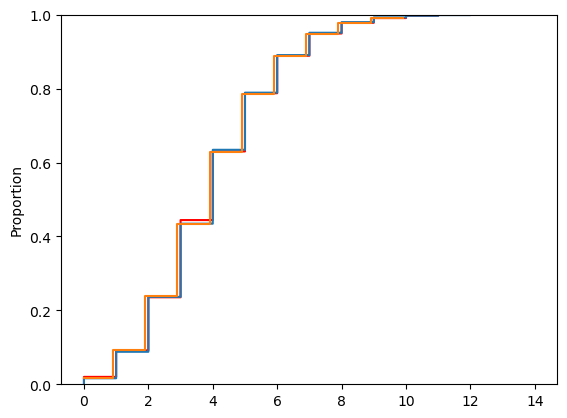

In [5]:
sns.ecdfplot(p1, color="r")
sns.ecdfplot(p2)
t = np.arange(0, 10, 0.1)
plt.step(t, poisson.cdf(t, 4))